In [1]:
import xarray as xr
import healpy as hp
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
res = 0.25
res_str = "0p25"

zoom = '10'
file = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT3H.z' + zoom + '.zarr'

ds2d = xr.open_zarr(file)
ds2d

<xarray.Dataset> Size: 53TB
Dimensions:   (cell: 12582912, time: 3497, pressure: 25)
Coordinates:
  * cell      (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    crs       float64 8B ...
  * pressure  (pressure) int64 200B 1 5 10 20 30 50 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
Data variables:
    cli       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    clw       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    hur       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    hus       (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    qg        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    qr        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    qs        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    ta        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    ua        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    va        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    wa        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
    zg        (time, pressure, cell) float32 4TB dask.array<chunksize=(1, 1, 1048576), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

In [3]:
def get_nn_lon_lat_index(nside, lons, lats):
    """
    nside: integer, power of 2. The return of hp.get_nside()
    lons: uniques values of longitudes
    lats: uniques values of latitudes
    returns: array with the HEALPix cells that are closest to the lon/lat grid
    """
    lons2, lats2 = np.meshgrid(lons, lats)
    return xr.DataArray(
        hp.ang2pix(nside, lons2, lats2, nest = True, lonlat = True),
        coords=[("lat", lats), ("lon", lons)],
    )

In [4]:
variable = "ua"
pressure = 850

x = ds2d[variable].sel(pressure=pressure)
x

<xarray.DataArray 'ua' (time: 3497, cell: 12582912)> Size: 176GB
dask.array<getitem, shape=(3497, 12582912), dtype=float32, chunksize=(1, 1048576), chunktype=numpy.ndarray>
Coordinates:
  * cell      (cell) int64 101MB 0 1 2 3 ... 12582908 12582909 12582910 12582911
    crs       float64 8B ...
    pressure  int64 8B 850
  * time      (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
Attributes:
    STASH:          [1, 15, 201]
    UM_name:        x_wind
    grid_mapping:   healpix_nested
    healpix_zoom:   10
    long_name:      eastward_wind
    source:         Data from Met Office Unified Model
    standard_name:  x_wind
    um_version:     13.5
    units:          m s-1

In [5]:
nside = hp.get_nside(x)
nside

1024

In [6]:
lon_min = 119.0
lon_max = 121.0
lat_min = -1.0
lat_max = 1.0

lon = np.arange(lon_min, lon_max + res, res)
lat = np.arange(lat_min, lat_max + res, res)

In [7]:
cells = get_nn_lon_lat_index(nside, lon, lat)
cells

<xarray.DataArray (lat: 9, lon: 9)> Size: 648B
array([[5606864, 5606775, 5609484, 5609489, 5608119, 5608140, 5608059,
        5608224, 5608199],
       [5606879, 5609606, 5609529, 5609546, 5609541, 5608182, 5608328,
        5608325, 5608246],
       [5609647, 5609652, 5609666, 5609581, 5609566, 5609731, 5608376,
        5608351, 5608388],
       [5610012, 5609707, 5609714, 5609693, 5609771, 5609776, 5609751,
        5608428, 5608411],
       [5610089, 5610074, 5610069, 5609894, 5609881, 5609834, 5609829,
        5609817, 5609130],
       [5610195, 5610280, 5610254, 5610257, 5609960, 5609935, 5609940,
        5610531, 5610520],
       [5610400, 5610375, 5610302, 5610337, 5610322, 5609980, 5610635,
        5610640, 5610551],
       [5615888, 5610422, 5610441, 5610362, 5610357, 5611014, 5610683,
        5610677, 5610694],
       [5615903, 5615940, 5610483, 5610461, 5611140, 5611059, 5611080,
        5610735, 5610740]])
Coordinates:
  * lat      (lat) float64 72B -1.0 -0.75 -0.5 -0.25 0.0 0.25 0.5 0.75 1.0
  * lon      (lon) float64 72B 119.0 119.2 119.5 119.8 ... 120.5 120.8 121.0

In [8]:
%%time

x_regridded = x.isel(cell=cells)
x_regridded = x_regridded.rename({"lon": "longitude", "lat": "latitude"})

x_regridded

CPU times: user 137 ms, sys: 3.73 ms, total: 141 ms
Wall time: 143 ms


<xarray.DataArray 'ua' (time: 3497, latitude: 9, longitude: 9)> Size: 1MB
dask.array<transpose, shape=(3497, 9, 9), dtype=float32, chunksize=(1, 9, 9), chunktype=numpy.ndarray>
Coordinates:
    cell       (latitude, longitude) int64 648B 5606864 5606775 ... 5610740
    crs        float64 8B ...
    pressure   int64 8B 850
  * time       (time) datetime64[ns] 28kB 2020-01-20 ... 2021-04-01
  * latitude   (latitude) float64 72B -1.0 -0.75 -0.5 -0.25 ... 0.5 0.75 1.0
  * longitude  (longitude) float64 72B 119.0 119.2 119.5 ... 120.5 120.8 121.0
Attributes:
    STASH:          [1, 15, 201]
    UM_name:        x_wind
    grid_mapping:   healpix_nested
    healpix_zoom:   10
    long_name:      eastward_wind
    source:         Data from Met Office Unified Model
    standard_name:  x_wind
    um_version:     13.5
    units:          m s-1

In [9]:
fileo = f"/scratch/gb02/mr4682/data/regridded/UM/testing/{variable}_{pressure}_zoom{zoom}_to_{res_str}deg_{lat_min:4.2f}_{lat_max:4.2f}_{lon_min:6.2f}_{lon_max:6.2f}.nc"

x_regridded.to_netcdf(path=fileo)

RuntimeError: error during blosc decompression: -1

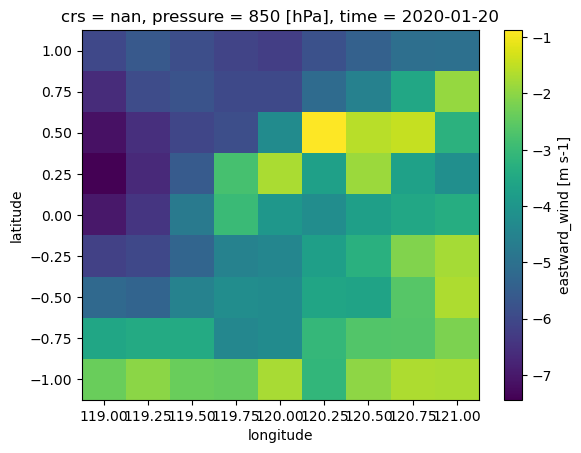

In [10]:
x_regridded.isel(time=0).plot()

In [11]:
x_regridded.compute()

RuntimeError: error during blosc decompression: -1